In [1]:
#Importation des modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Ouverture du fichier

usa_acp =  pd.read_csv('ind_acp.csv', sep=',')



usa_acp.head(10)

,cbssa,Richesse,Indice d'ethnicité,Candidat
0,10100,0.250359,-1.836170,Trump
1,10140,-1.069122,-1.462359,Trump
2,10180,-0.081085,0.879834,Trump
3,10220,-0.314890,0.333946,Trump
4,10300,-0.133229,-1.530328,Trump
5,10420,0.984583,-1.079679,Clinton
6,10460,-0.894044,1.328981,Trump
7,10500,-1.442324,2.582505,Clinton
8,10540,-0.093329,-1.671683,Trump
9,10580,3.132685,-1.325317,Trump


In [3]:
for i in range(917):
    if usa_acp.Candidat[i] == 'Trump':
        usa_acp.Candidat[i] = 1
    else:
        usa_acp.Candidat[i] = 0
        

C:\Users\Sofiane\AppData\Local\Temp/ipykernel_8352/541520176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_acp.Candidat[i] = 1
C:\Users\Sofiane\AppData\Local\Temp/ipykernel_8352/541520176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_acp.Candidat[i] = 0


In [4]:
y = usa_acp.Candidat
y.head(20)

0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    1
15    1
16    1
17    0
18    1
19    1
Name: Candidat, dtype: object

In [5]:
#Indexer l'identifiant des communes
usa_acp = usa_acp.set_index('cbssa')

usa_acp

,Richesse,Indice d'ethnicité,Candidat
cbssa,,,
10100,0.250359,-1.836170,1
10140,-1.069122,-1.462359,1
10180,-0.081085,0.879834,1
10220,-0.314890,0.333946,1
10300,-0.133229,-1.530328,1
...,...,...,...
49660,-1.774471,-1.381035,1
49700,1.915814,2.041526,1
49740,-1.074864,3.571302,1


In [6]:
acp_trump = usa_acp[usa_acp['Candidat'] == 1]
acp_clinton = usa_acp[usa_acp['Candidat'] == 0]


# 1 - Projection graphique des individus

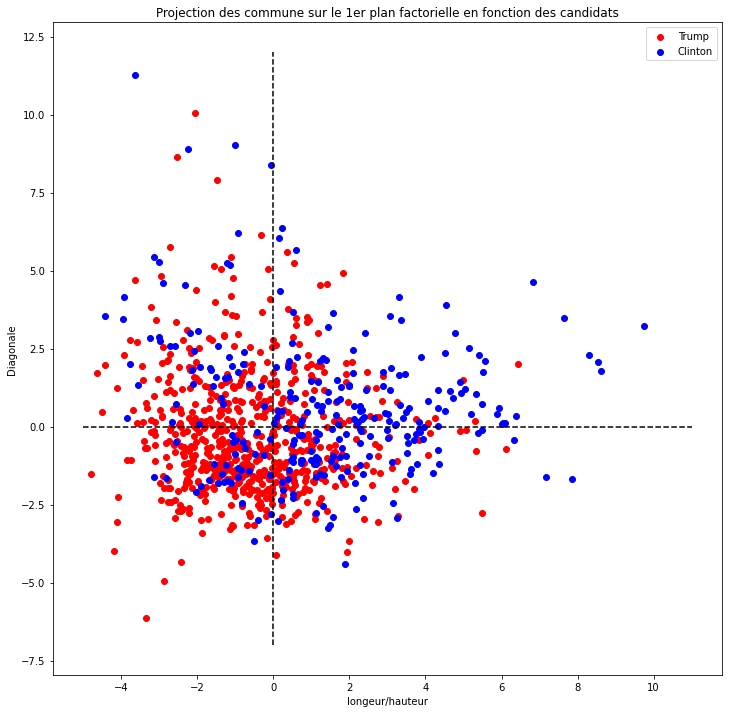

In [7]:
plt.figure(figsize=(12,12))

plt.scatter(acp_trump.Richesse,acp_trump['Indice d\'ethnicité'],c='red',label = "Trump")
plt.scatter(acp_clinton.Richesse,acp_clinton['Indice d\'ethnicité'],c='blue',label = "Clinton")

    
plt.plot([-5,11],[0,0], color = 'black', ls='--')#Afficher une ligne horizontale
plt.plot([0,0],[-7,12], color = 'black', ls='--')#Afficher une ligne verticale    
    
plt.legend()
    
plt.ylabel('Diagonale')
plt.xlabel('longeur/hauteur')
    
plt.title("Projection des commune sur le 1er plan factorielle en fonction des candidats")    
plt.savefig("IndividusPlan_candidat.png") 

# 2- Construction du K-Means

In [8]:
#Importation du module pour les clusters

#pour déterminer les clusters
from sklearn import cluster, metrics 

#module pour faire le K-Means
from sklearn.cluster import KMeans


### 2-1 Choix du nombre de clusters

#### Coeficient de silhouette

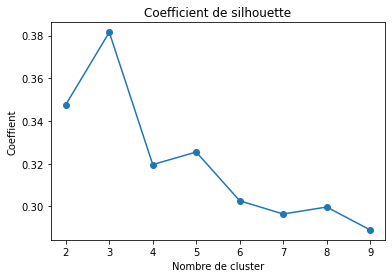

In [9]:
#Calcul du coefficient de silhouettes

silhouettes = []
for num_clusters in range(2,10):
    cls = cluster.KMeans(n_clusters = num_clusters,
                        n_init=1,
                        init='random')
    cls.fit(usa_acp)
    silh = metrics.silhouette_score(usa_acp,cls.labels_)
    silhouettes.append(silh)
    
#Afficher graphiquement ce coefficient 
plt.plot(range(2,10),silhouettes,marker='o')
plt.title("Coefficient de silhouette")
plt.xlabel('Nombre de cluster')
plt.ylabel('Coeffient')
plt.savefig('coef_solhouette.png')
plt.show()

Le coefficient de silhouette est la plus élevé pour 3 clusters donc on aura 3 groupes 


#### Méthode du coude 

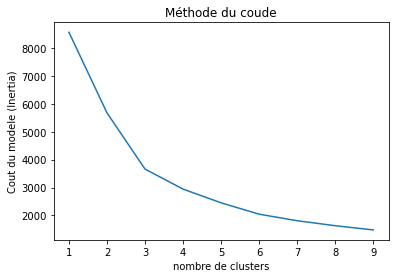

In [10]:
#Méthodes du coude

inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k).fit(usa_acp)
    inertia.append(model.inertia_)

    
#Afficher graphiquement ce coefficient     
plt.plot(K_range, inertia)
plt.title("Méthode du coude")
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.savefig('methode_coude.png')
plt.show()

In [11]:
#Choix du nombre de cluster 
km = KMeans(n_clusters = 3)
km.fit(usa_acp)

#Récupération des cluster attribué à chaque individu
cluster = km.labels_
model = KMeans(n_clusters=3)
model.fit(usa_acp)

#On peut comment sont classées les points selon les clusters
model.predict(usa_acp)




array([1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0,
       2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 2,
       1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1,

In [12]:
### mettre en DataFrame
cluster_df = pd.DataFrame(model.predict(usa_acp))

#Renommage des colonnes
cluster_df = cluster_df.rename(columns = {0:'Cluster'})

cluster_df = cluster_df.reset_index(drop = True)


cluster_df

,Cluster
0,1
1,1
2,0
3,1
4,1
...,...
912,1
913,2
914,0
915,1


In [13]:
#Dexindexer la colonne 
usa_acp = usa_acp.reset_index()

#Fusion des données avec le fichier d'ACP
usa_cluster = pd.concat([usa_acp, cluster_df],axis=1)

#Reindexer
usa_cluster =  usa_cluster.set_index('cbssa')


usa_cluster.to_csv('ind_acp_cluster.csv')

usa_cluster

,Richesse,Indice d'ethnicité,Candidat,Cluster
cbssa,,,,
10100,0.250359,-1.836170,1,1
10140,-1.069122,-1.462359,1,1
10180,-0.081085,0.879834,1,0
10220,-0.314890,0.333946,1,1
10300,-0.133229,-1.530328,1,1
...,...,...,...,...
49660,-1.774471,-1.381035,1,1
49700,1.915814,2.041526,1,2
49740,-1.074864,3.571302,1,0


### 2-2 Projection des clusters

In [14]:
cluster1 = usa_cluster[usa_cluster['Cluster'] == 0]
cluster2 = usa_cluster[usa_cluster['Cluster'] == 1]
cluster3 = usa_cluster[usa_cluster['Cluster'] == 2]

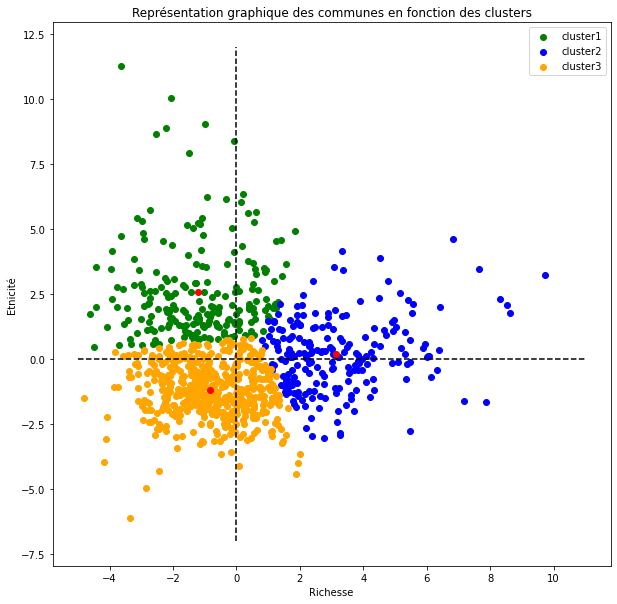

In [15]:
plt.figure(figsize=(10,10))

plt.scatter(cluster1.Richesse,cluster1['Indice d\'ethnicité'],c='green',label ='cluster1')
plt.scatter(cluster3.Richesse,cluster3['Indice d\'ethnicité'],c='blue',label = 'cluster2')
plt.scatter(cluster2.Richesse,cluster2['Indice d\'ethnicité'],c='orange',label = 'cluster3')

plt.legend()


#On va placer les centroïdes 
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')

plt.plot([-5,11],[0,0], color = 'black', ls='--')#Afficher une ligne horizontale
plt.plot([0,0],[-7,12], color = 'black', ls='--')#Afficher une ligne verticale   

plt.title("Représentation graphique des communes en fonction des clusters")

plt.xlabel("Richesse")
plt.ylabel("Etnicité")


plt.savefig("Cluster_K-Means.png")

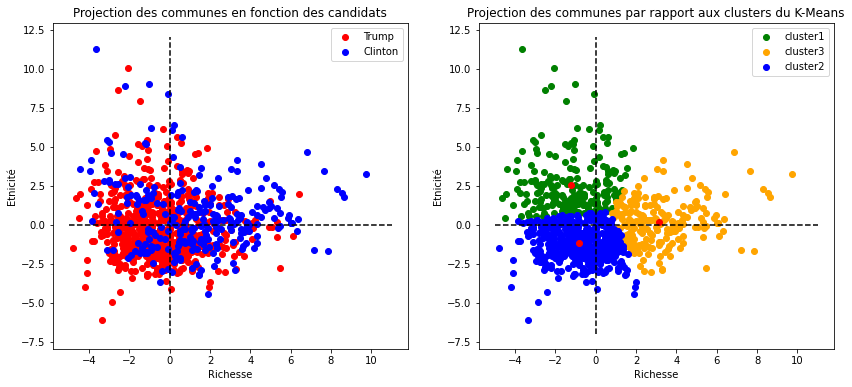

In [16]:
fig = plt.figure(figsize=(14,6))

#Graphique de gauche
ax = fig.add_subplot(121)

plt.scatter(acp_trump.Richesse,acp_trump['Indice d\'ethnicité'],c='red',label = "Trump")
plt.scatter(acp_clinton.Richesse,acp_clinton['Indice d\'ethnicité'],c='blue',label = "Clinton")
plt.plot([-5,11],[0,0], color = 'black', ls='--')#Afficher une ligne horizontale
plt.plot([0,0],[-7,12], color = 'black', ls='--')#Afficher une ligne verticale    
plt.legend()
plt.xlabel("Richesse")
plt.ylabel("Etnicité")
plt.title("Projection des communes en fonction des candidats")   


#Graphique de DROITE
ax = fig.add_subplot(122)
plt.scatter(cluster1.Richesse,cluster1['Indice d\'ethnicité'],c='green',label ='cluster1')
plt.scatter(cluster3.Richesse,cluster3['Indice d\'ethnicité'],c='orange',label = 'cluster3')
plt.scatter(cluster2.Richesse,cluster2['Indice d\'ethnicité'],c='blue',label = 'cluster2')

plt.legend()

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
plt.plot([-5,11],[0,0], color = 'black', ls='--')#Afficher une ligne horizontale
plt.plot([0,0],[-7,12], color = 'black', ls='--')#Afficher une ligne verticale   
plt.title("Projection des communes par rapport aux clusters du K-Means")
plt.xlabel("Richesse")
plt.ylabel("Etnicité")

plt.savefig("Comparaison_Cluster_Candidat.png") 

### 2-3 Analyse des centroïdes

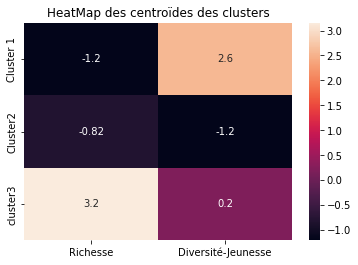

In [17]:
#Afficher les valeurs des centroïdes 
cluster_fac =pd.DataFrame(model.cluster_centers_)

cluster_fac = cluster_fac[[0,1]]
cluster_fac = cluster_fac.rename(index={0:'Cluster 1',1:'Cluster2',2:'cluster3'},columns={0:'Richesse',1:'Diversité-Jeunesse'})

sns.heatmap(cluster_fac,annot = True,xticklabels = True, yticklabels = True )

plt.title('HeatMap des centroïdes des clusters')

plt.savefig('HeatMap Clusters.png')

plt.show()

# 3 - Analyse des clusters

In [18]:
#Dexindexer la colonne 
usa_cluster = usa_cluster.reset_index()

for i in range(917):
    if usa_cluster.Cluster[i] == 0:
        usa_cluster.Cluster[i] = 'Cluster 0'
    elif usa_cluster.Cluster[i] == 1:
        usa_cluster.Cluster[i] = 'Cluster 1'
    else :
        usa_cluster.Cluster[i] = 'Cluster 2'

        
for i in range(917):
    if usa_cluster.Candidat[i] == 0:
        usa_cluster.Candidat[i] = 'Clinton'
    else:
        usa_cluster.Candidat[i] = 'Trump'
        
        
#Reindexer
usa_cluster =  usa_cluster.set_index('cbssa')


usa_cluster.to_csv('ind_acp_cluster2.csv')

usa_cluster

C:\Users\Sofiane\AppData\Local\Temp/ipykernel_8352/1014875171.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_cluster.Cluster[i] = 'Cluster 1'
C:\Users\Sofiane\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Sofiane\AppData\Local\Temp/ipykernel_8352/1014875171.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa

,Richesse,Indice d'ethnicité,Candidat,Cluster
cbssa,,,,
10100,0.250359,-1.836170,Trump,Cluster 1
10140,-1.069122,-1.462359,Trump,Cluster 1
10180,-0.081085,0.879834,Trump,Cluster 0
10220,-0.314890,0.333946,Trump,Cluster 1
10300,-0.133229,-1.530328,Trump,Cluster 1
...,...,...,...,...
49660,-1.774471,-1.381035,Trump,Cluster 1
49700,1.915814,2.041526,Trump,Cluster 2
49740,-1.074864,3.571302,Trump,Cluster 0


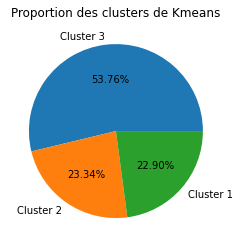

In [19]:
cluster = usa_cluster["Cluster"].value_counts()


plt.pie(cluster,labels = ["Cluster 3","Cluster 2","Cluster 1"], autopct = '%.2f%%')
plt.title('Proportion des clusters de Kmeans')

plt.savefig("cluster_prop")

plt.show()


In [20]:
cluster

Cluster 1    493
Cluster 0    214
Cluster 2    210
Name: Cluster, dtype: int64

### 4-2 Clusters en lien avec les candidats

In [21]:
 #Tableau de contingence

table  = pd.crosstab(usa_cluster['Cluster'],usa_cluster['Candidat'],margins = True)


table

Candidat,Clinton,Trump,All
Cluster,,,
Cluster 0,61,153,214
Cluster 1,76,417,493
Cluster 2,133,77,210
All,270,647,917


In [22]:
from scipy.stats import chi2_contingency as chi2_contingency

khi2, pval , ddl, contingent_theorique  = chi2_contingency(table)

In [23]:
liste = [khi2,pval,ddl] 

liste

[162.88689459504565, 1.4484597555291935e-32, 6]

In [24]:
table_théorique = pd.DataFrame(contingent_theorique)

In [25]:
table_théorique

,0,1,2
0,63.009815,150.990185,214.0
1,145.158124,347.841876,493.0
2,61.832061,148.167939,210.0
3,270.000000,647.000000,917.0
